## CSCI 347 - Project 3 </br>
#### Mason Reyher, Colby Roberts, Charlie Weitzenberg, Erin Scheunemann, Megan Fehres

Choose a data set that you are interested in from the UCI Machine Learning Repository that
has at least 5 numerical attributes, and that you believe may contain clusters. Only use the
numerical attributes for this project. Note: if you are planning to complete the extra credit
portion of this project, you will need to use a data set that has class labels (ground truth
cluster labels), i.e., a classification data set, in order to compute the accuracy of the clustering.
If you would like to use a data set from a different source, please discuss this with me.


### Part 1: Think about the data
Answer the following questions:

Tetuan city power consumption dataset was chosen. </br>
52417 rows, 9 attributes. 8 numerical attributes.

1. [1 point] Why are you interested in this data set?


I know next to nothing about Tetouan, a city in Morocco. However, being in the northern tip of Africa (and a maritime climate), I presume the climate of this area is dynamic to say the least. I imagine there will be clusters based on the temperatures and certain city zones.

2. [1 point] How many numerical attributes and categorical attributes are there in the data set?


There are 8 numerical attributes and 1 categorical (datetime).

3. [1 point] Are there any missing values? If there are missing values, how are you planning to
handle these (will all data instances with missing values be removed? Will all attributes with
missing values be removed? Will missing values be imputed? If so, how?)


None.

4. Before doing any analysis, answer the following questions:


1. [1 point] Why do you expect clusters to be present in the data?


When temperature is drastically high, many in the city will turn on their air conditioning (high power usage). There should be a postive correlation and cluster (using DBSCAN, not kmeans) as temperature increases, with power usage. It will be interesting to see if the city zone will cluster separately -- a rich district versus a poor district. However, due soley to temperature and energy usage, there will be some sort of cluster(s).

2. [1 point] Why might finding clusters in this data set be helpful (how might this help us
understand or analyze the data)?

If there are clusters present between different city zones, we can use that to determine what district of the city is using tons of power. In an effort to save power, or an initiative to reduce power usage (plant trees on the tops of buildings to absorb heat in the high usage areas) we can use clustering to gain insight in how to reduce power usage.

3. [1 point] How many clusters do you expect to see in the data? Provide a range of values
to answer this question. For example, 2 to 4. Why do you expect a number of clusters
in this range?

Between 2 and 3. Either there will be no cluster between city districts, and there will only be clusters correlating to power usage and temperature; or there will be three clusters between power usage and city districts. If the latter clusters are true, there will be much more useful data. 

4. [1 point] Do you expect that the clusters will be of similar size (i.e., cluster 1 is about the
same size as cluster 2, is about the same size as cluster 3, etc..)? Why or why not?


They probably won't be. The city districts are probably not the same size. More people live in one area but are poorer, and less people live in another and have more money. For example, in a richer district with less people, they'll use more power for air conditioning in the summer. In a poorer district, there will be more people, but cannot afford to use air conditioning as much, therefore power usage will decrease (this could be the complete opposite too). 

### Part 2: Write functions for graph analysis in Python
Write the following functions in Python. You may use scikit-learn or other packages to check
the correctness of your implementation, but you may not use any existing clustering algorithm
implementation in your code.

In [1]:
%pip install pandas -q
%pip install numpy -q
%pip install scikit-learn -q
%pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
city_data = pd.read_csv('tetuan_city_power_consumption.csv')

5. [10 points] A function that implements the k-means clustering algorithm. The function
should take a data matrix, a number of clusters k, and a convergence parameter epsilon,
as input, and return the representatives (means) as well as the clusters found using k-
means. If the distance is the same between a point and more than one representative
(mean), then assign the point to the mean corresponding to the cluster with the lowest
index.

In [4]:
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt
import pandas as pd

def kmeans(data, k, epsilon):  # epsilon is the amount of change acceptable
    dimension = len(data[0])
    max = np.amax(data, 0) # max vals in each col
    min = np.amin(data,0) # min vals in each col
    guesses = [[0 for i in range(0,dimension)] for j in range(0,k)] # array for guesses with dimension, dimension x k
    for i in range(0, k):
        for j in range(0, dimension):
            guesses[i][j] = random.uniform(min[j], max[j]) # random num between min and max for col
    return kcluster(data, guesses, epsilon) # input data, initial randomized means, and epsilon

def kcluster(data, means, epsilon): # this is so we can go again until difference in means < epsilon
    cluster_assignments = np.zeros(len(data))  # make all assignments 0
    distances = np.ones(len(data))*np.inf # set all dist to infinity
    num_nodes_in_cluster = [0 for i in range(0, len(means))]
    for point in range(0, len(data)): # this sorts the points into the k clusters based on dist to means
        for k in range(0, len(means)):
            new_distance = m.dist(data[point], means[k]) # dist from point to mean
            if new_distance < distances[point]: # if the distance is smaller (THIS IS WHY WE START WITH INF)
                distances[point] = new_distance # set to smaller dist
                cluster_assignments[point] = k # assign to that mean's cluster
        num_nodes_in_cluster[int(cluster_assignments[point])] += 1 # add one to total nodes in cluster
    new_means = [[0 for i in range(0, len(data[0]))] for j in range(0, len(means))]
    for point in range(0, len(data)): # add up all points in the clusters
        new_means[int(cluster_assignments[point])] = np.add(new_means[int(cluster_assignments[point])], data[point])
    for k in range(0, len(means)): # divide all sums by the total num in that cluster
        new_means[k] = np.divide(new_means[k], num_nodes_in_cluster[k])
    for k in range(0, len(means)):
        if m.dist(means[k], new_means[k]) > epsilon: # if the dist greater than epsilon
            kcluster(data, new_means, epsilon) # run again
    return new_means, cluster_assignments # otherwise if all dist < epsilon return means and assignments

6. [10 points] A function that implements the DBSCAN clustering algorithm. The function
should take a data matrix and the parameters minpts and epsilon as input, and return the
clusters found using DBSCAN, where each data point is labeled as either a noise point, a
border point, or a core point.

In [5]:
def dbscan(df, min, e):
    pass

7. Extra credit (5 points): A function that computes the precision of a clustering. The function
should take a list of true cluster labels and a list of the cluster labels returned by some
clustering algorithm, and return the precision of the clustering.


In [6]:
def cluster_prec(true_labels, labels):
    pass

### Part 3: Analyze your data
Report the following, using tables or figures as appropriate. You may use scikit-learn’s
implementation of k-means and DBSCAN, but you are encouraged to first try using your own
implementations on real-world data.

8. [4 points] Use sklearn’s PCA implementation to linearly transform the data to two
dimensions. Create a scatter plot of the data, with the x-axis corresponding to coordinates
of the data along the first principal component, and the y-axis corresponding to
coordinates of the data along the second principal component. Does it look like there are
clusters in these two dimensions? If so, how many would you say there are?


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv('C:/Users/cweit/Desktop/Jupyter Lab/data/tetuan_city_power_consumption.csv', header=None, skiprows=1) 
df = df.drop(df.columns[0], axis=1)
array=df.values

pca = PCA(n_components=2)
arrayt = pca.fit_transform(array)

plt.scatter(array[:,0], array[:,1], s=1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data')
plt.show()
    
arrayt = standard_normalize(array)

9. [3 points] Use sklearn’s PCA implementation to linearly transform the data, without
specifying the number of components to use. Create a plot with r, the number of
components (i.e., dimensionality), on the x-axis, and f(r), the fraction of total variance
captured in the first r principal components, on the y-axis. Based on this plot, choose a
number of principal components to reduce the dimensionality of the data. Report how
many principal components will be used as well as the faction of total variance captured
using this many components.

ValueError: x and y must have same first dimension, but have shapes (7,) and (8,)

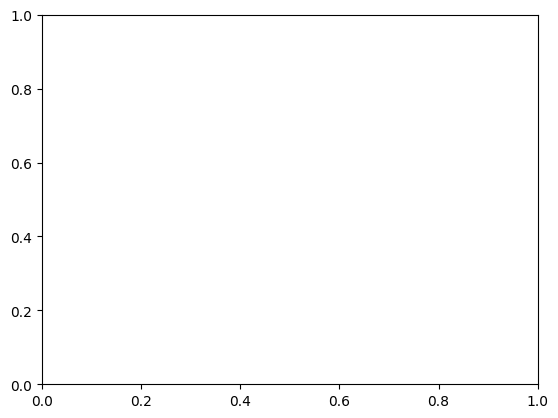

In [13]:
import sklearn.preprocessing
import sklearn.decomposition

dataArr = city_data.drop(city_data.columns[0], axis=1)
array = dataArr.values
length, width = array.shape
pca = sklearn.decomposition.PCA(n_components = width)
tf = pca.fit_transform(array)
varExp = pca.explained_variance_ratio_
cs = np.cumsum(varExp)

plt.plot(range(1, width+1), cs)
plt.xlabel('Number Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

10. [5 points] For both the original and the reduced-dimensionality data obtained using PCA in
question 9, do the following: Experiment with a range of values for the number of clusters,
k, that you pass as input to the k-means function, to find clusters in the chosen data set.
Use at least 5 different values of k. For each value of k, report the value of the objective
function for that choice of k.

11. [5 points] For both the original and the reduced-dimensionality data obtained using PCA in
question 9, do the following: Experiment with a range of values for the mints and epsilon
input parameters to the DBSCAN function to find clusters in the chosen data set. First keep
epsilon fixed and try out a range of different values for minpts. Then keep minpts fixed, and
try a range of values for epsilon. Use at least 5 values of epsilon and at least 5 values of
minpts. Report the number of clusters found for each (minpts, epsilon) pair tested.


12. Extra credit (3 points): Create a plot of clustering precision for each value of k used in
question 10, each value of epsilon used in question 11, and each value of mints used in
question 11, for both the original and reduced-dimensionality data.
